In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#d is pandas datasetobject and distributing X and Y
d=pd.read_csv("class1.csv")
print(d[:10])
x=d.iloc[:,:-1].values
y=d.iloc[:,-1].values

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
5   27            58000          0
6   27            84000          0
7   32           150000          1
8   25            33000          0
9   35            65000          0


In [3]:
#handelling missing data
from sklearn.impute import SimpleImputer as Imputer
imp=Imputer(missing_values=np.nan, strategy='mean')
imp.fit(x)
x=imp.transform(x)

In [4]:
#splitting data to train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
#feature scalling of x
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [6]:
#building a naive bayes classifier object
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [7]:
#predicting x_test set
y_pred=classifier.predict(x_test)

In [8]:
#evaluting type1 and type2 error by confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[54  4]
 [ 1 21]]


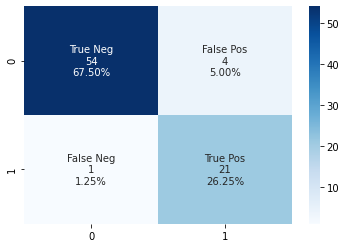

In [9]:
#visualizing confussion matrix
import seaborn as sns
def drawCmPlot(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

drawCmPlot(cm)

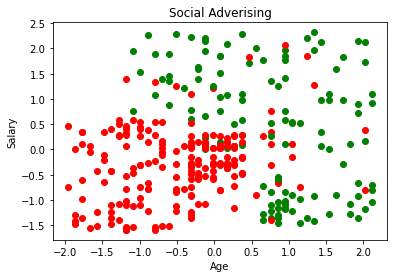

In [10]:
# Visualising the Training set results
import matplotlib.pyplot as plt
cls_clr={0:"red",1:"green"}
for i in range(x_train.shape[0]):
    plt.scatter(x_train[i,0],x_train[i,1], color=cls_clr[y_train[i]])
plt.title('Social Adverising')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

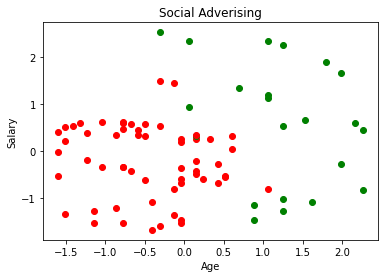

In [11]:
# Visualising the Test set results
for i in range(x_test.shape[0]):
    plt.scatter(x_test[i,0],x_test[i,1], color=cls_clr[y_test[i]])
plt.title('Social Adverising')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

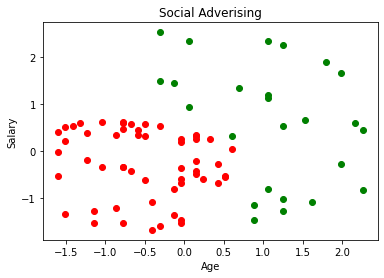

In [12]:
# Visualising the Test-pred set results
for i in range(x_test.shape[0]):
    plt.scatter(x_test[i,0],x_test[i,1],color=cls_clr[y_pred[i]])
plt.title('Social Adverising')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()